In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
data_path = Path.cwd().parent / 'data' / 'advertising.csv'
df = pd.read_csv(data_path)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


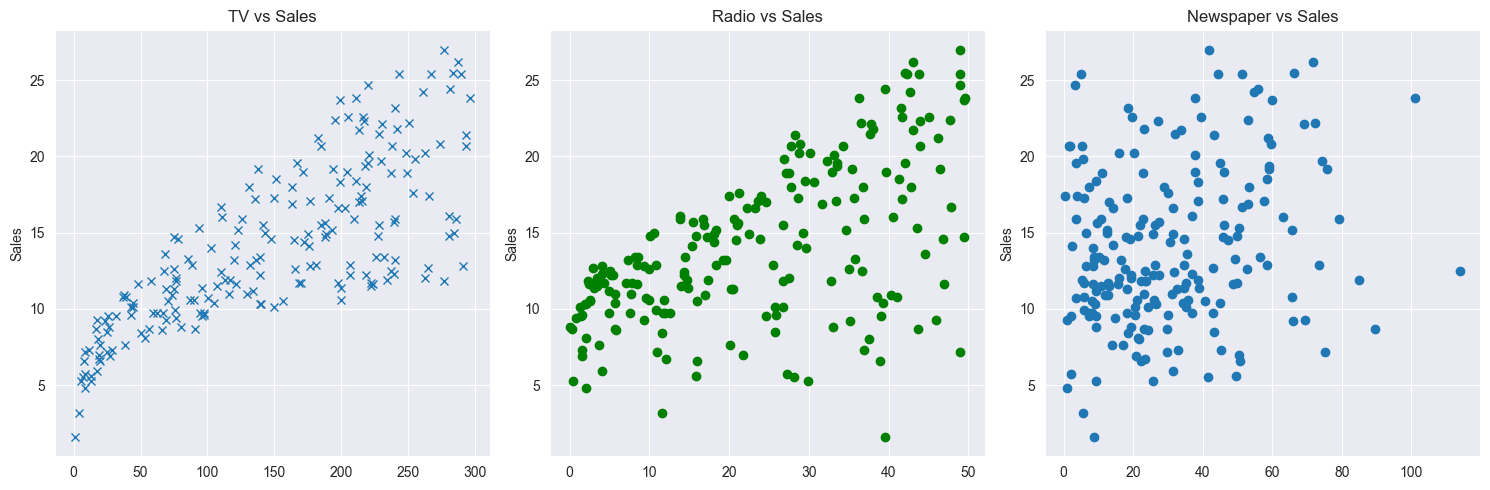

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(df['TV'], df['sales'], 'x')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

axes[1].plot(df['radio'], df['sales'], 'go')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')
plt.tight_layout()

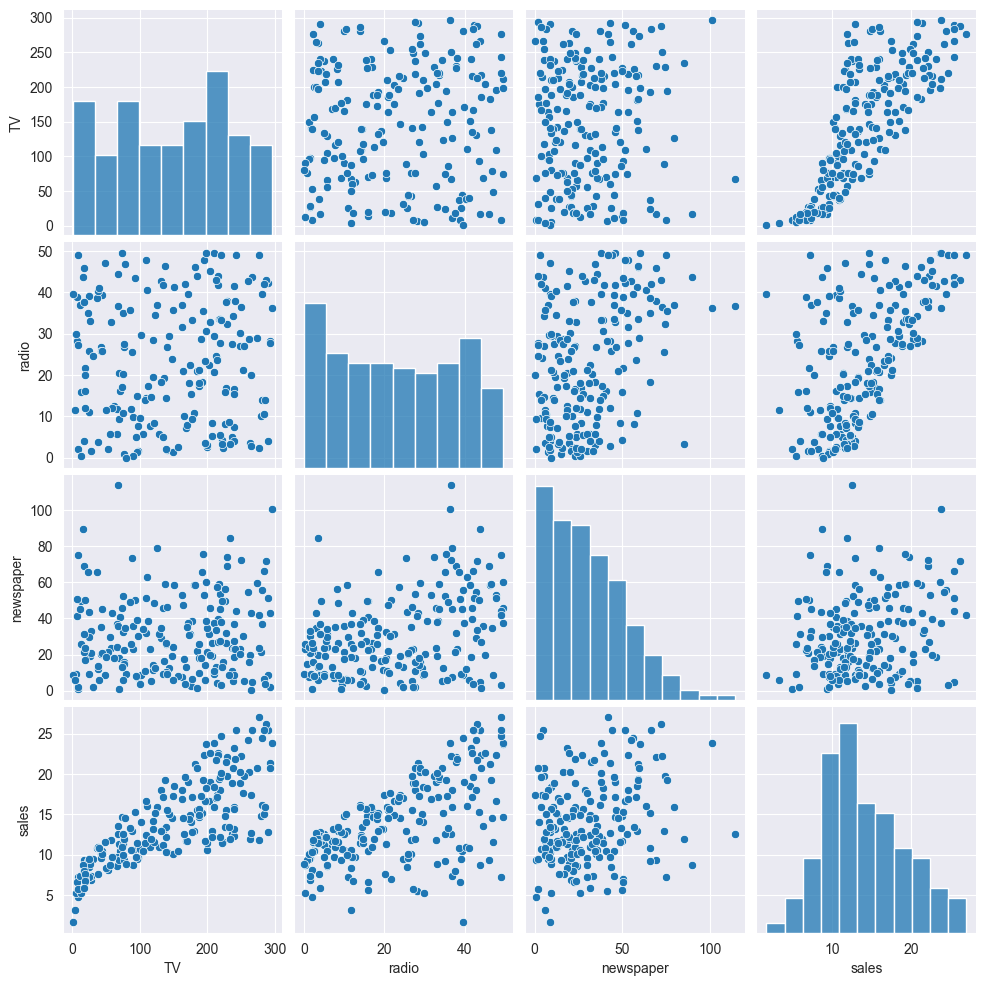

In [20]:
sns.pairplot(df)

In [23]:
X = df.drop('sales', axis=1)
y = df['sales']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test, test_predictions)

In [37]:
MSE = mean_squared_error(y_test, test_predictions)

In [40]:
RMSE = np.sqrt(MSE)

In [41]:
MAE

1.213745773614481

In [42]:
MSE

2.2987166978863782

In [43]:
RMSE

1.516151937599388

In [ ]:
# Next residuals 